# Investing Program Type Prediction
This dataset was found in https://www.kaggle.com/snassimr/data-for-investing-type-prediction
## Description
### Context

Data was created as a part of real-world Data Science Project in effort to predict what investment program to offer to investment bank customer . The bank found very useful to predict the investing program type beforehand and not to try and offer both products to specific customer. The project was held about 12 year ago and most of modern techniques and algorithms weren't available.
### Content

Data contains of one dataset and provided in csv format. In order to anonymize data we provided the description for group of columns and specific columns that their meaning can be guessed easily.
Input features group description :

    SE1 (Age) , SE2 (Geographic location) - Customer data
    BA1 – BA7 – Banking activity , money equivalent for general activities on customer’s bank account in last year , i.e. sum of payments for loan return
    PE1 – PE15 – Investing history , flag if customer had one of 15 popular investment products/programs in last year
    IA1 – IA3 – Investing activity , counts for different types of operations on investment accounts in last year

You can find more information regarding specific columns in "Columns" section : feature presentation , missing data , etc .
### Inspiration

In the past , 12 years years ago , we didn't achieve good enough model and had to redefine the problem that was successfully solved. Nowadays , the required performance likely be achieved with current state-of-art techniques and algorithms.

Some basic sklearn.ensemble.RandomForestClassifier achieve about 8% improvement comparing to our before 12 years model for selected performance metric and 3 fold CV . But , this improvement still wouldn't have been enough.

Try to improve further and see if current feature engineering , modeling or AutoML tools can drive the performance over 90%.

Thanks and Good luck !!!

## Preprocessing
### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(25,6)}) #Changing figure size from seaborn graphics

In [3]:
df = pd.read_csv("investing_program_prediction_data.csv", header = 0)
df.head()

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3,InvType
0,45,G29,12,0.0,5934,0,0,0,0,I0,...,I0,I0,I0,I0,I0,I0,0,0,1,C1
1,41,G0,0,0.0,21514,316374,5142,0,5141,I0,...,I0,I0,I1,I1,I1,I0,0,0,1,C1
2,43,G0,1,0.0,14324,22344,22344,0,22344,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
3,36,G52,16,0.0,41114,2406838,1156219,692875,41425,I0,...,I1,I1,I1,I1,I0,I0,0,0,0,C1
4,2,G10,0,0.0,2394,621,621,0,621,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SE1      4734 non-null   int64  
 1   SE2      4734 non-null   object 
 2   BA1      4734 non-null   int64  
 3   BA2      4734 non-null   float64
 4   BA3      4734 non-null   int64  
 5   BA4      4734 non-null   int64  
 6   BA5      4734 non-null   int64  
 7   BA6      4734 non-null   int64  
 8   BA7      4734 non-null   int64  
 9   PE1      4734 non-null   object 
 10  PE2      4734 non-null   object 
 11  PE3      4734 non-null   object 
 12  PE4      4734 non-null   object 
 13  PE5      4734 non-null   object 
 14  PE6      4734 non-null   object 
 15  PE7      4734 non-null   object 
 16  PE8      4734 non-null   object 
 17  PE9      4734 non-null   object 
 18  PE10     4734 non-null   object 
 19  PE11     4734 non-null   object 
 20  PE12     4734 non-null   object 
 21  PE13     4734 

The first thing that I can see through data, there are no missing values, so, I will explore data using graphics to understand data type in each column.

### Exploring data
### Categorical variables

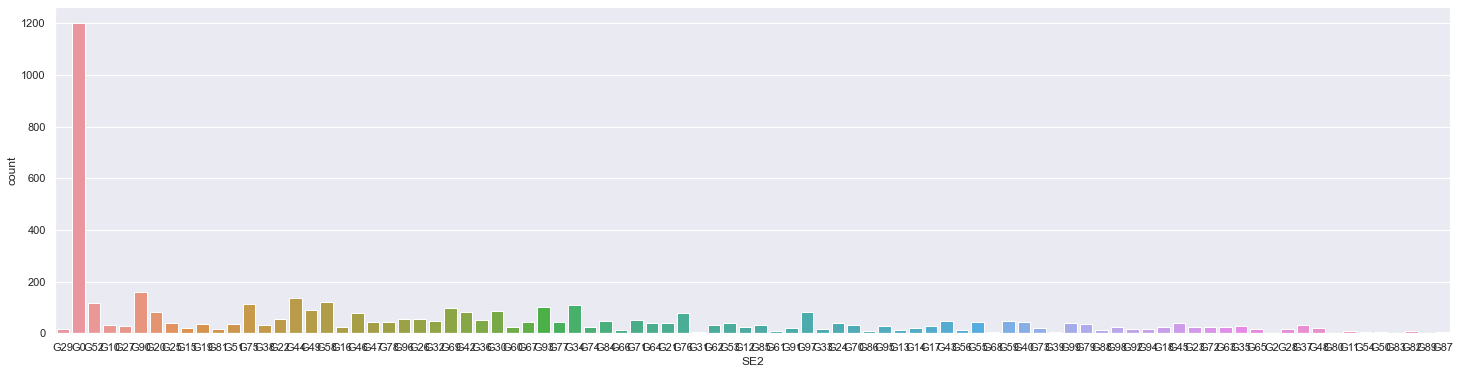

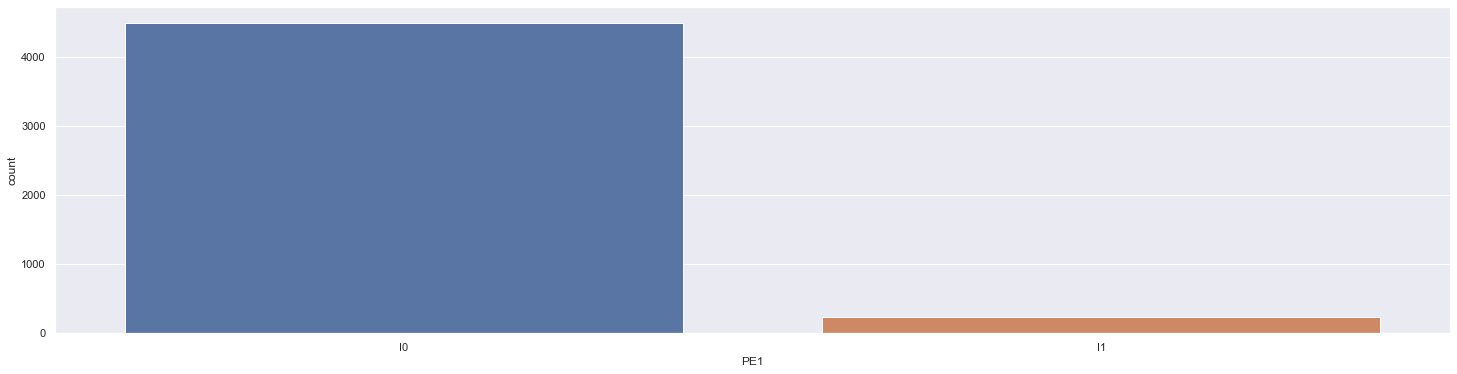

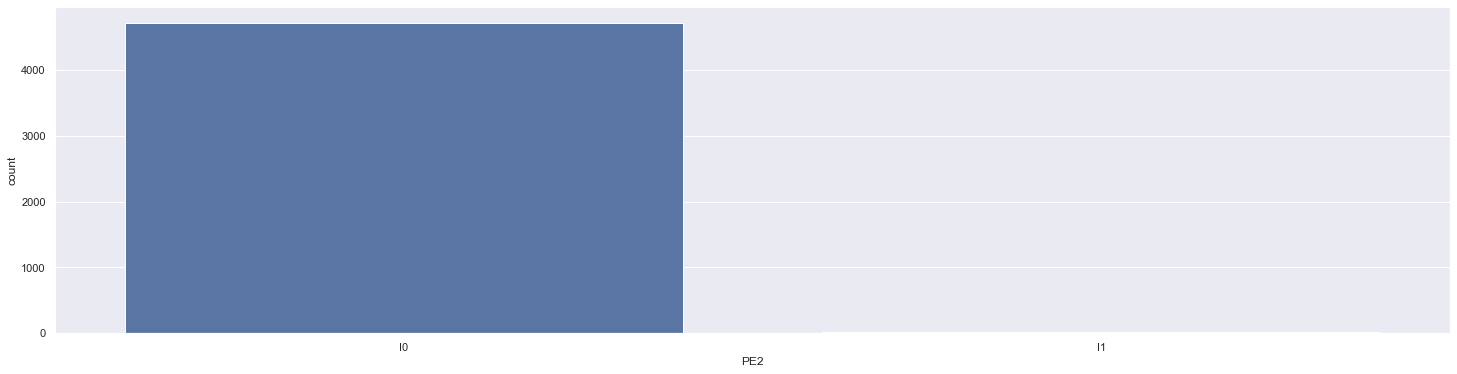

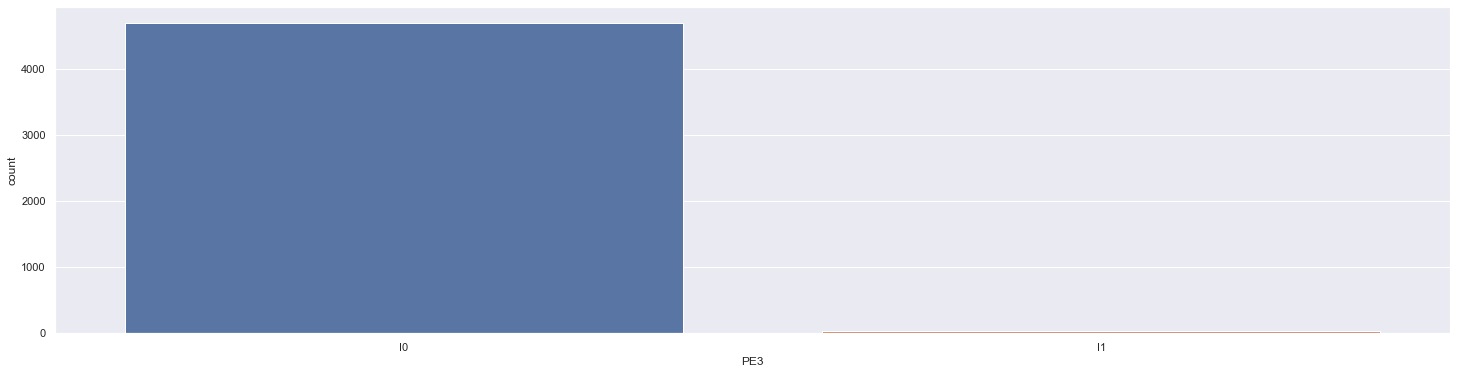

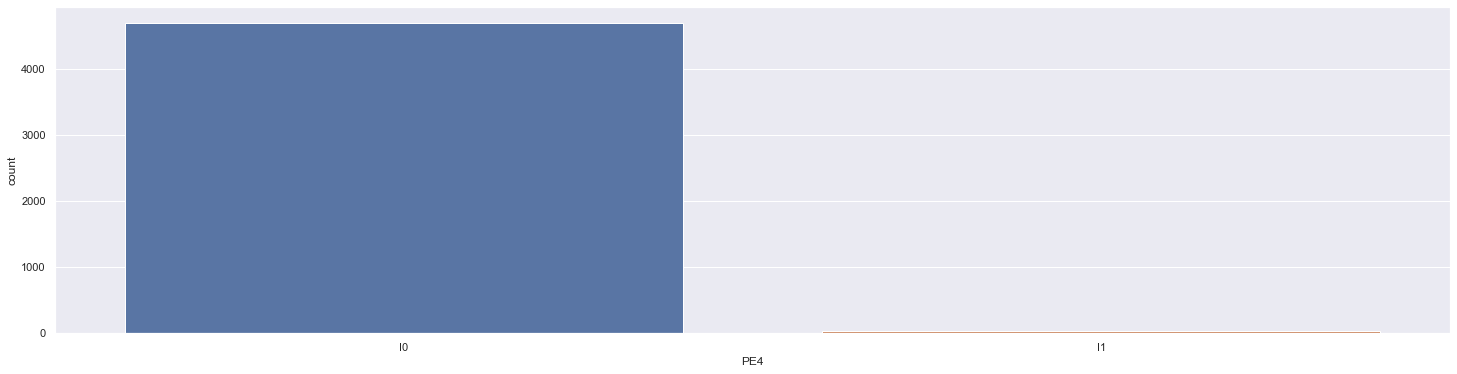

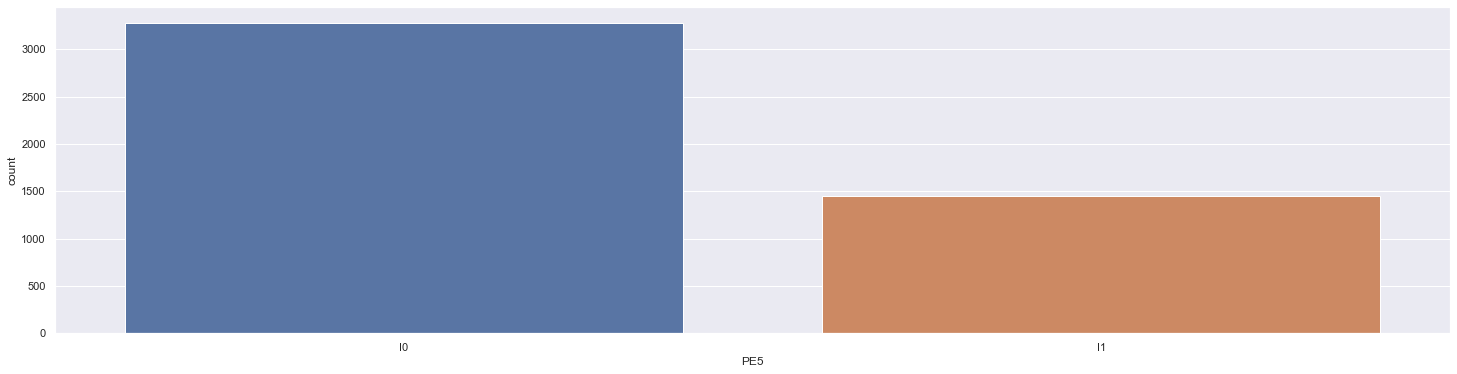

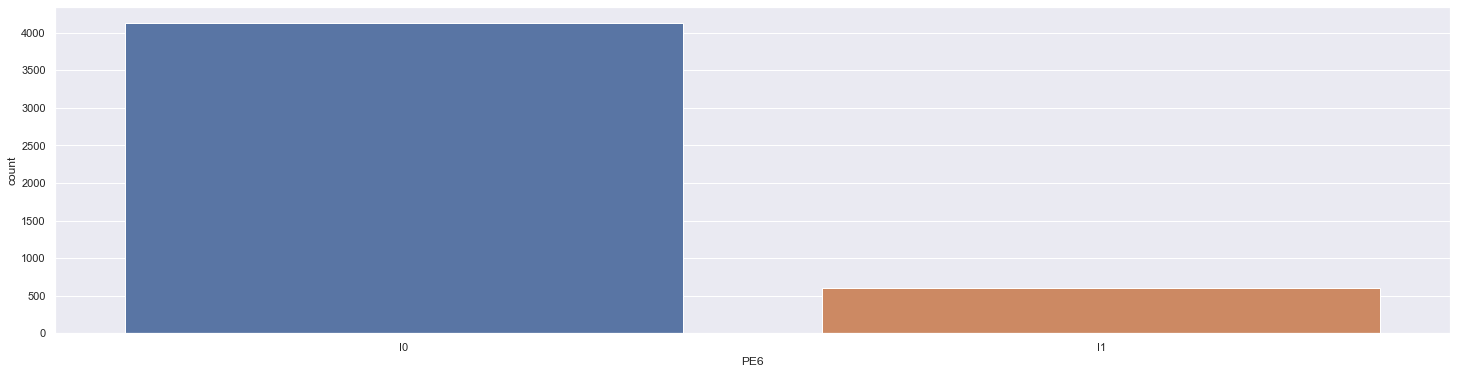

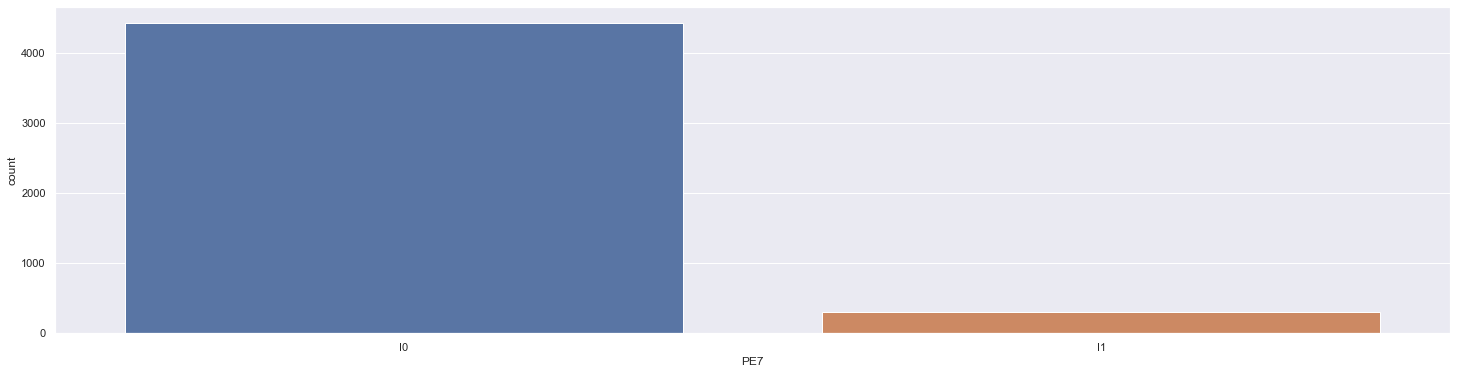

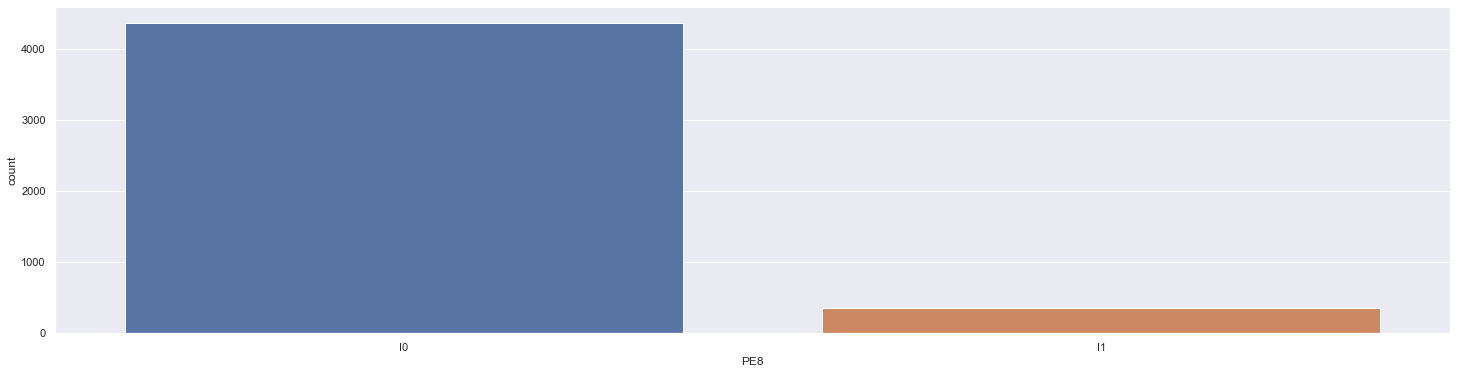

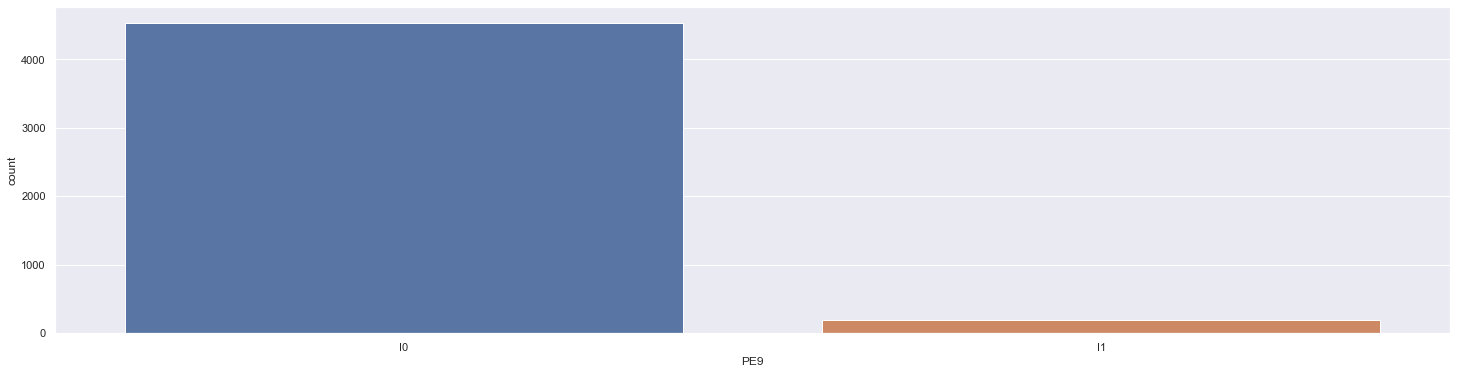

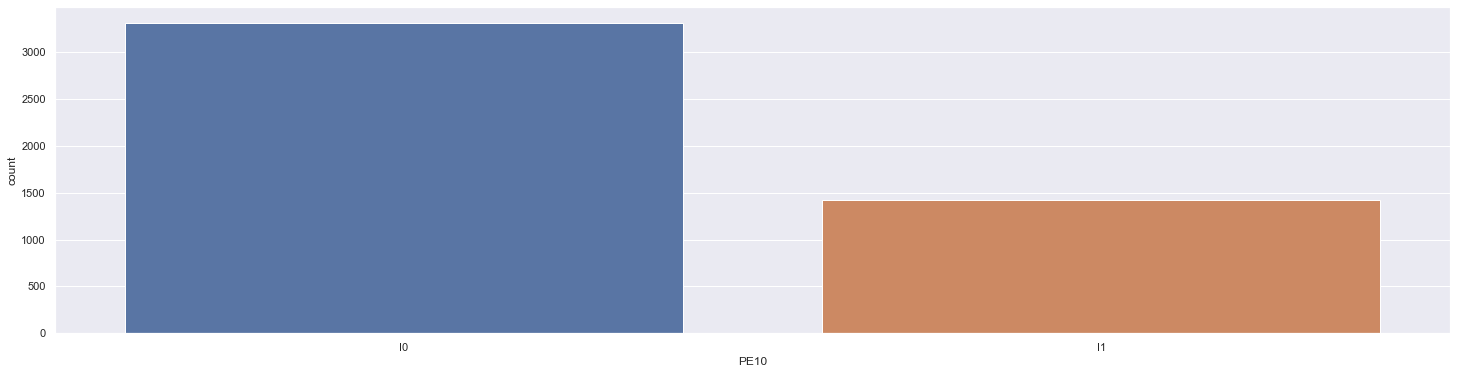

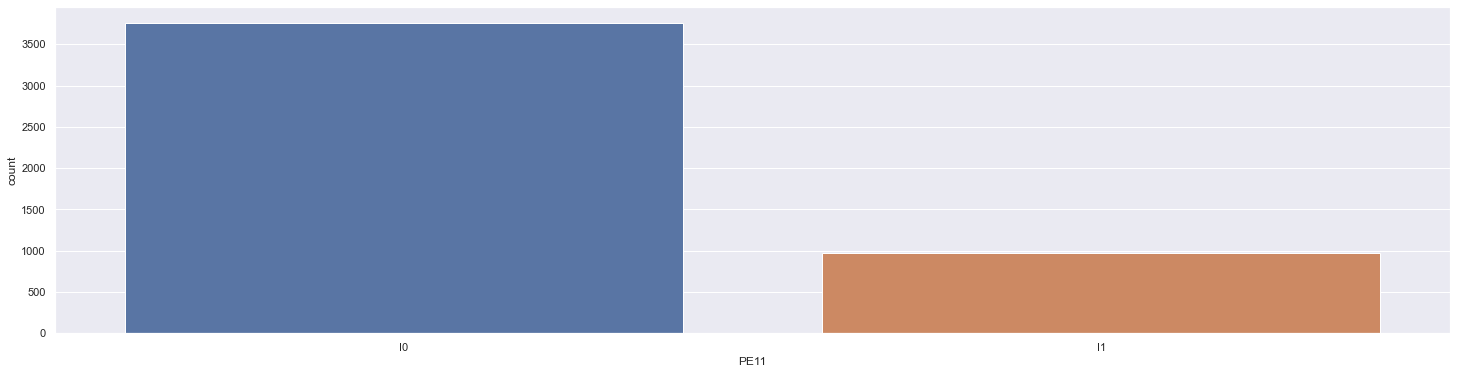

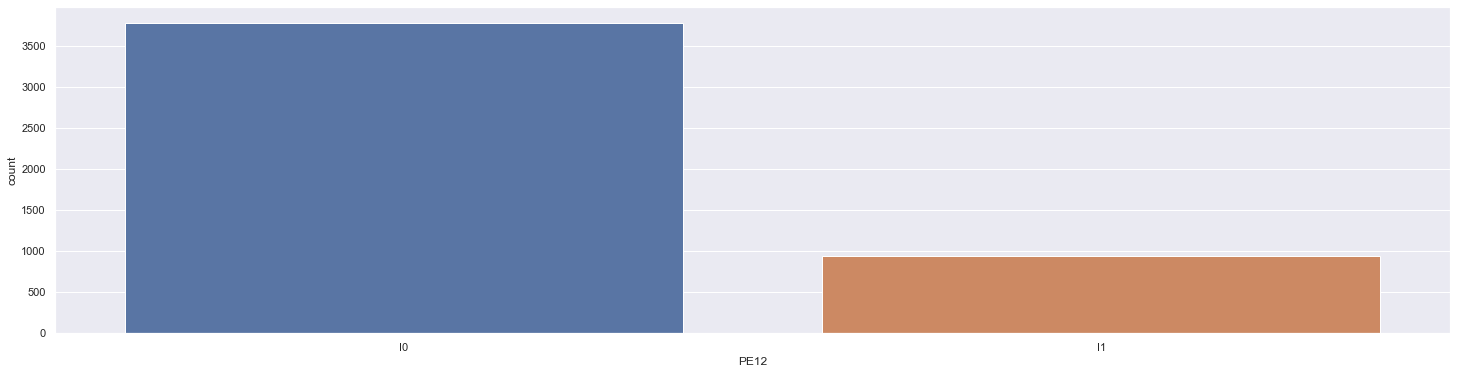

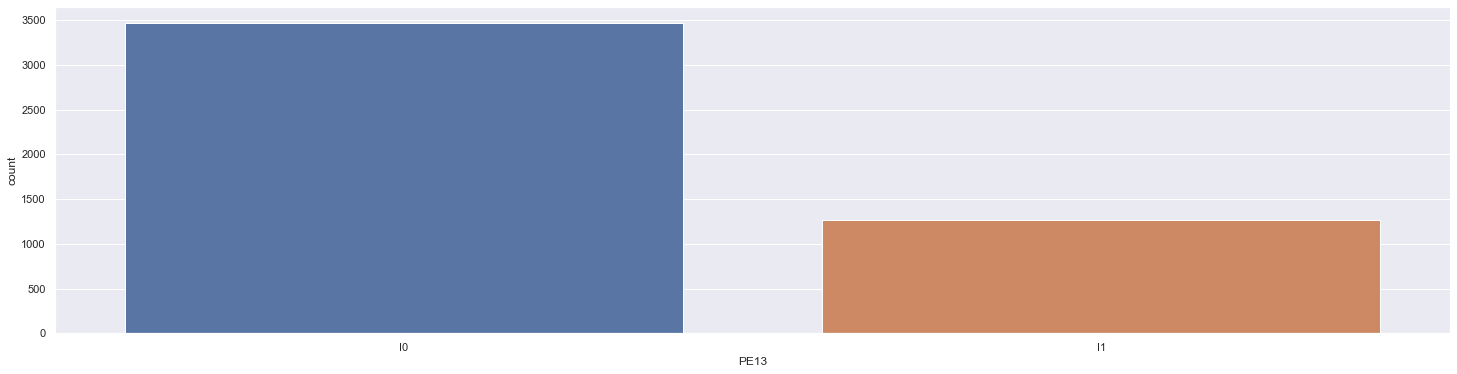

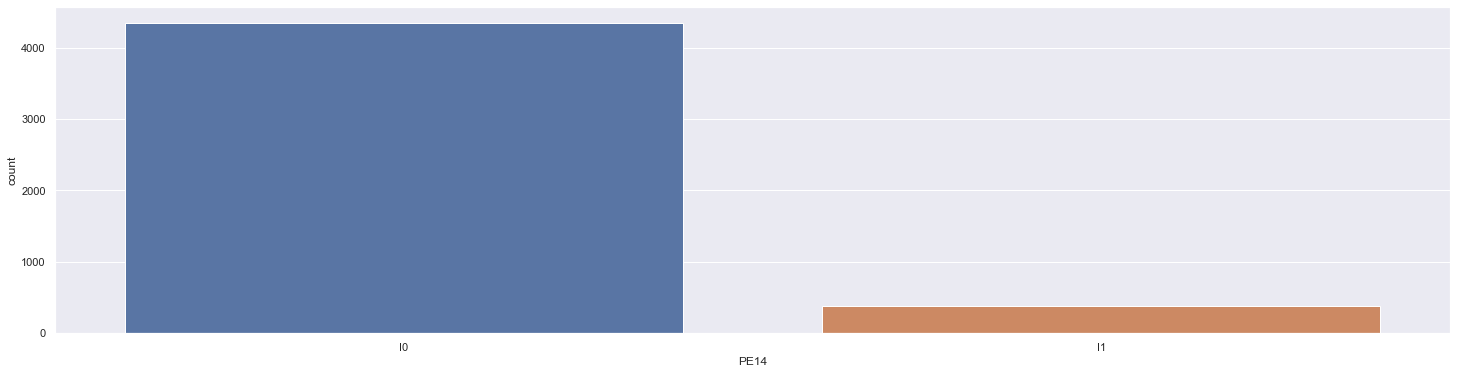

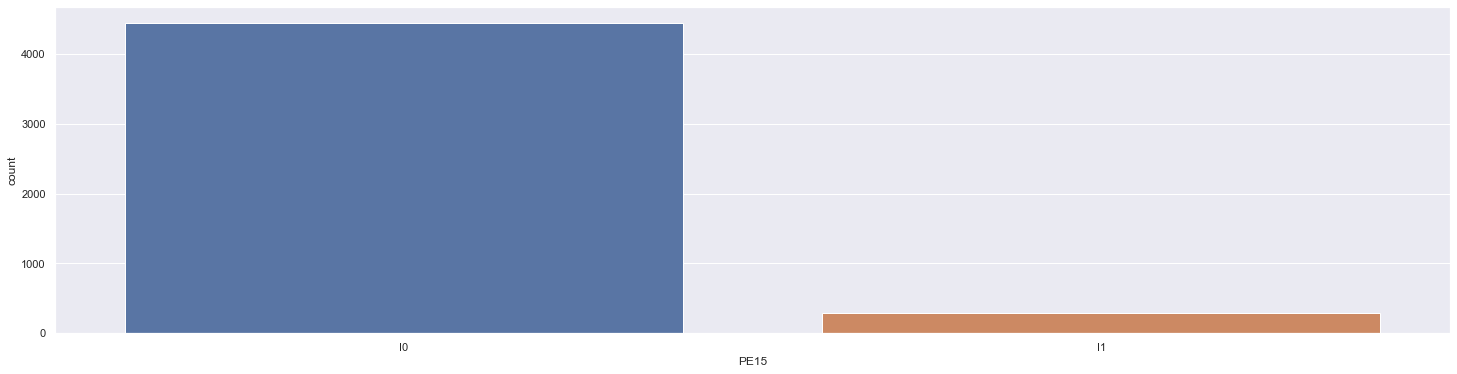

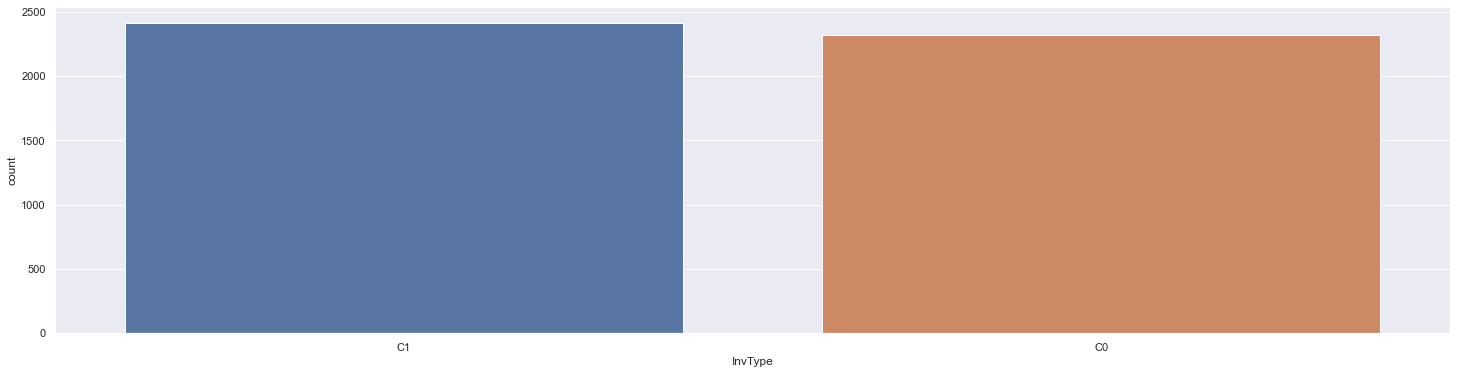

In [5]:
for column in df.columns:
    if df[column].dtype == np.dtype("O"):
        sns.countplot(x = column, data = df)
        plt.show()

I can see that I can Translate these categorical variables to numerical variables.

In [6]:
for column in df.columns:
    if df[column].dtype == np.dtype("O"):
        df[column] = df[column].str.extract("(\d+)").astype("int64")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SE1      4734 non-null   int64  
 1   SE2      4734 non-null   int64  
 2   BA1      4734 non-null   int64  
 3   BA2      4734 non-null   float64
 4   BA3      4734 non-null   int64  
 5   BA4      4734 non-null   int64  
 6   BA5      4734 non-null   int64  
 7   BA6      4734 non-null   int64  
 8   BA7      4734 non-null   int64  
 9   PE1      4734 non-null   int64  
 10  PE2      4734 non-null   int64  
 11  PE3      4734 non-null   int64  
 12  PE4      4734 non-null   int64  
 13  PE5      4734 non-null   int64  
 14  PE6      4734 non-null   int64  
 15  PE7      4734 non-null   int64  
 16  PE8      4734 non-null   int64  
 17  PE9      4734 non-null   int64  
 18  PE10     4734 non-null   int64  
 19  PE11     4734 non-null   int64  
 20  PE12     4734 non-null   int64  
 21  PE13     4734 

Translating those object values to numerical values is completed.

### Numerical variables

In [8]:
df.describe()

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3,InvType
count,4734.000000,4734.000000,4734.000000,4734.000000,4.734000e+03,4.734000e+03,4.734000e+03,4.734000e+03,4.734000e+03,4734.000000,...,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000
mean,43.465357,41.153147,4.853612,707.814911,8.648174e+04,5.353285e+05,2.647640e+05,1.332180e+05,9.522675e+04,0.049430,...,0.299958,0.205323,0.199409,0.266793,0.081327,0.060414,0.011618,0.000634,0.427123,0.510351
std,15.646703,32.326358,7.477688,9620.039964,2.100368e+05,1.167569e+06,6.642276e+05,4.816864e+05,2.308034e+05,0.216786,...,0.458288,0.403980,0.399598,0.442330,0.273365,0.238277,0.394972,0.043602,0.830991,0.499946
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,9.237250e+03,6.550250e+03,5.589500e+03,0.000000e+00,3.668000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,42.000000,1.000000,0.000000,2.616450e+04,7.373750e+04,5.401150e+04,0.000000e+00,2.404400e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,69.000000,7.000000,0.000000,8.255700e+04,5.576665e+05,2.771580e+05,5.119850e+04,9.624475e+04,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.000000,99.000000,106.000000,341698.220000,4.459345e+06,3.332942e+07,2.881915e+07,1.125846e+07,4.739885e+06,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,3.000000,9.000000,1.000000


The first thing that I am going to do with this information is reducting dimension of the variables usin sums or maximum values.
1. BA values are money fron banking activities, I am going to create a BA variable with sum of each BA value.
2. PE values indicate if a customer had some product, I am going to create a PE variable with the maximum value of all PE value, because in thos columns there are 0 and 1, so if there is a 0 in PE variable, that means that customer never had some product.
1. IA values are counts for different operations , I am going to create a IA variable with sum of each IA value.

In [9]:
df["BA"] = df.iloc[:, 2:9].sum(axis = 1) #Creating BA variable
for column in df.iloc[:, 2:9].columns:
    del df[column]                       #Deleting the used variables

In [10]:
df["PE"] = df.iloc[:, 2:17].max(axis = 1) #Creating PE variable
for column in df.iloc[:, 2:17].columns:
    del df[column]                        #Deleting the used variables

In [11]:
df["IA"] = df.iloc[:, 2:5].sum(axis = 1) #Creating IA variable
for column in df.iloc[:, 2:5].columns:
    del df[column]                       #Deleting the used variables

In [12]:
df["Age"] = df["SE1"] #Changing the name of SE1 variable
df["Location_number"] = df["SE2"] #Changing the name of SE2 variable
del df["SE1"]
del df["SE2"]

In [13]:
df.head()

,InvType,BA,PE,IA,Age,Location_number
0,1,5946.0,0,1,45,29
1,1,348171.0,1,1,41,0
2,1,81357.0,0,0,43,0
3,1,4338487.0,1,0,36,52
4,1,4257.0,0,0,2,10


I can convert 28 columns into 6 columns using all available information.
### Outliers exploration and treatment

In [14]:
df.describe()

,InvType,BA,PE,IA,Age,Location_number
count,4734.000000,4.734000e+03,4734.000000,4734.000000,4734.000000,4734.000000
mean,0.510351,1.115732e+06,0.481411,0.439375,43.465357,41.153147
std,0.499946,2.193119e+06,0.499707,0.936625,15.646703,32.326358
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.961875e+04,0.000000,0.000000,33.000000,0.000000
50%,1.000000,3.239905e+05,0.000000,0.000000,43.000000,42.000000
75%,1.000000,1.289307e+06,1.000000,1.000000,55.000000,69.000000
max,1.000000,6.640518e+07,1.000000,29.000000,96.000000,99.000000


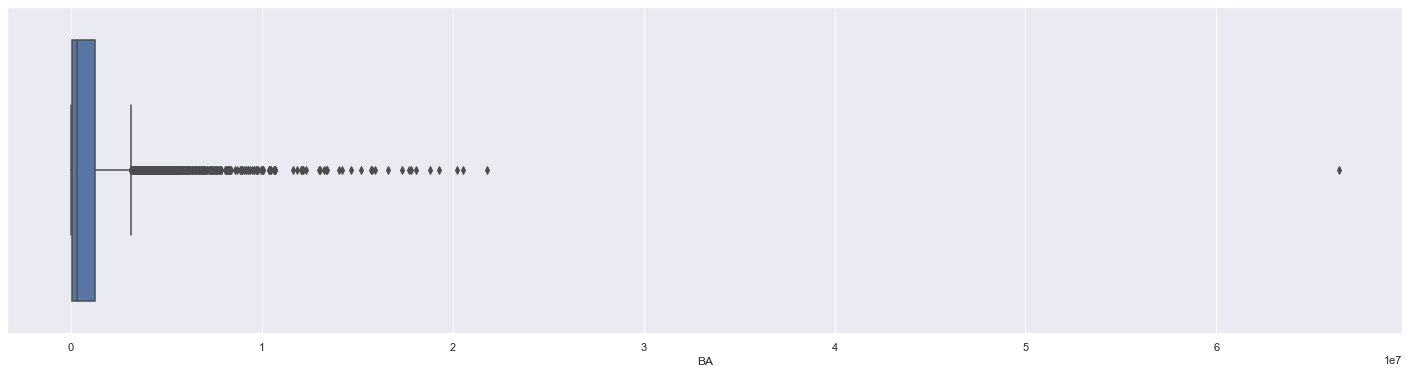

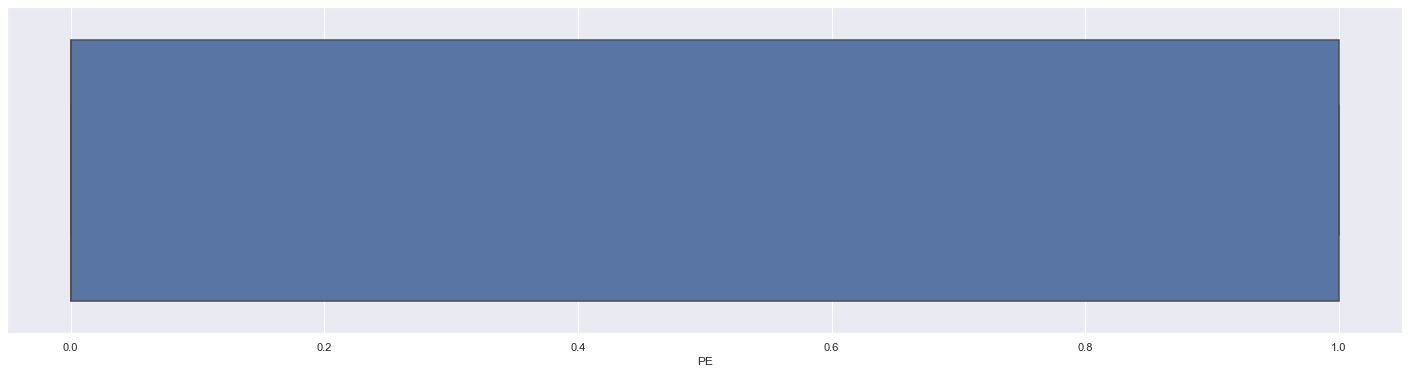

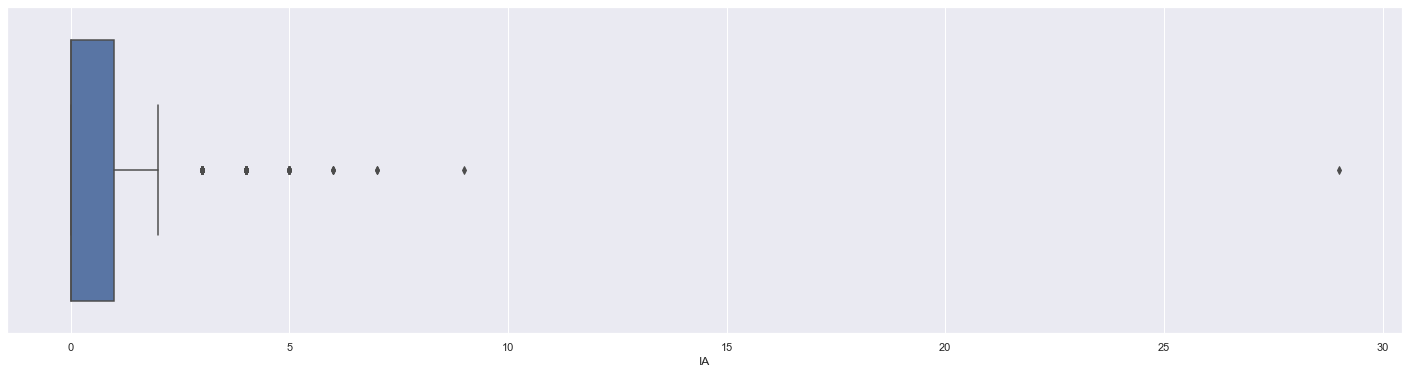

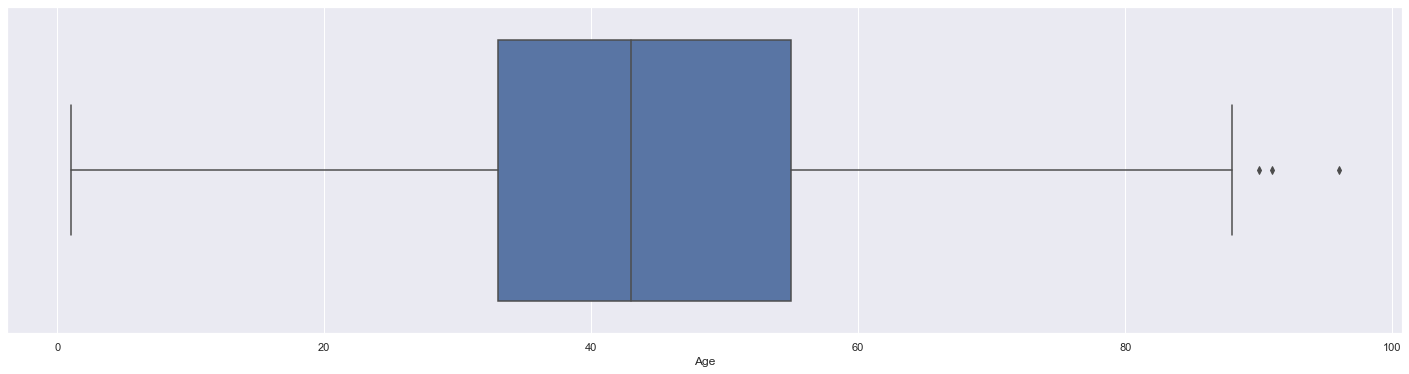

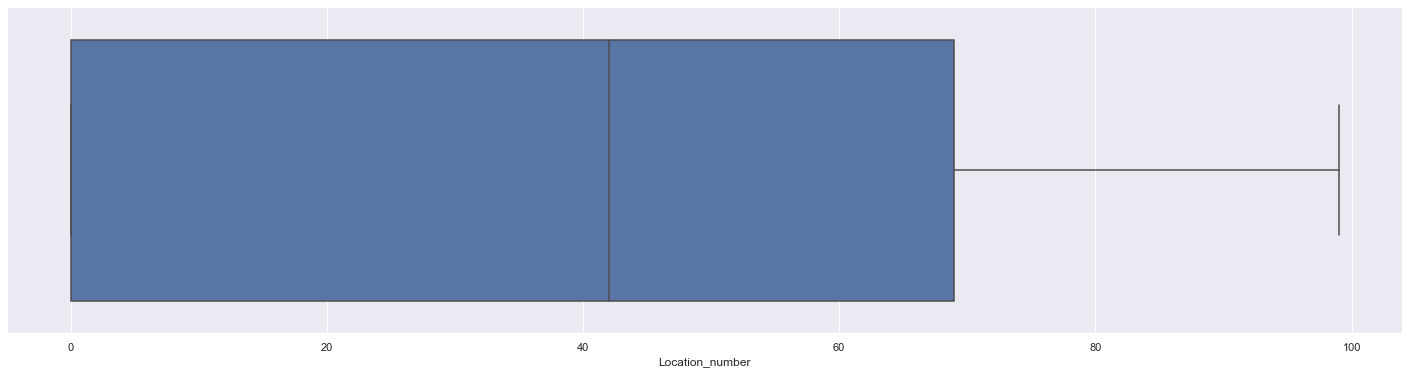

In [15]:
for column in df.iloc[:, 1:]:
    sns.boxplot(x = column, data = df)
    plt.show()

With this information, I see some variables could have problems, in particular BA

In [16]:
for column in df.iloc[:, 1:]:
    sup = 2 * np.nanpercentile(df[column], 99)
    inf = 0.2 * np.nanpercentile(df[column], 1)
    df[column][df[column] > sup] = sup
    df[column][df[column] < inf] = inf

<ipython-input-16-f726d3d4eb31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] > sup] = sup
<ipython-input-16-f726d3d4eb31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] < inf] = inf
<ipython-input-16-f726d3d4eb31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] > sup] = sup
<ipython-input-16-f726d3d4eb31>:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [17]:
df.describe()

,InvType,BA,PE,IA,Age,Location_number
count,4734.000000,4.734000e+03,4734.000000,4734.000000,4734.000000,4734.000000
mean,0.510351,1.104600e+06,0.481411,0.434728,43.465357,41.153147
std,0.499946,1.983456e+06,0.499707,0.844731,15.646703,32.326358
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.961875e+04,0.000000,0.000000,33.000000,0.000000
50%,1.000000,3.239905e+05,0.000000,0.000000,43.000000,42.000000
75%,1.000000,1.289307e+06,1.000000,1.000000,55.000000,69.000000
max,1.000000,1.911697e+07,1.000000,8.000000,96.000000,99.000000


I reducted a little the standard deviation from BA variable using outliers treatment, at this moment, data is ready for modelling creation.

## Model creation
In this section, I am going to develop different model for practice purposes, with the goal to find the best model for this dataset. In this case 0:product A and 1: product B in InvType variable.
### x - y data split

In [18]:
y = df["InvType"]
x = df.drop("InvType", axis = 1)
x.head()

,BA,PE,IA,Age,Location_number
0,5946.0,0,1,45,29
1,348171.0,1,1,41,0
2,81357.0,0,0,43,0
3,4338487.0,1,0,36,52
4,4257.0,0,0,2,10


### Rescalling x data

In [19]:
from sklearn.preprocessing import StandardScaler
x_s = StandardScaler().fit_transform(x)
x_s.shape

(4734, 5)

### Train - validation - test data split

In [20]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(x_s, y, test_size = 0.2, 
                                                              random_state = 0)
print(x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape)

(3787, 5) (947, 5) (3787,) (947,)


In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, 
                                                              test_size = 0.2, 
                                                              random_state = 0)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, 
      x_test.shape, y_test.shape)

(3029, 5) (3029,) (758, 5) (758,) (947, 5) (947,)


### First model block
Logistic classifier, Linear discriminant (and quadratic) and KNN

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [23]:
#Logistic regression
params = {"solver": ["liblinear", "newton-cg", "sag", "saga"]}
clf_log = LogisticRegression(random_state = 0, n_jobs = -1)
gscv_log = GridSearchCV(clf_log, params, n_jobs = -1, cv = 5)
gscv_log.fit(x_train_full, y_train_full)
best_log = gscv_log.best_estimator_
y_pred_log = best_log.predict(x_test)
accuracy_score(y_pred_log, y_test)

C:\Users\Rolando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


0.617740232312566

In [24]:
#Linear Discriminant Analysis
params = {"solver": ["svd", "lsqr", "eigen"]}
clf_lda = LinearDiscriminantAnalysis()
gscv_lda = GridSearchCV(clf_lda, params, n_jobs = -1, cv = 5)
gscv_lda.fit(x_train_full, y_train_full)
best_lda = gscv_lda.best_estimator_
y_pred_lda = best_lda.predict(x_test)
accuracy_score(y_pred_lda, y_test)

0.6198521647307286

In [25]:
#Quadratic Discriminant Analysis
params = {}
clf_qda = QuadraticDiscriminantAnalysis()
gscv_qda = GridSearchCV(clf_qda, params, n_jobs = -1, cv = 5)
gscv_qda.fit(x_train_full, y_train_full)
best_qda = gscv_qda.best_estimator_
y_pred_qda = best_lda.predict(x_test)
accuracy_score(y_pred_qda, y_test)

0.6198521647307286

In [26]:
#KNN
params = {"n_neighbors": np.arange(1, int(np.around(0.8*len(x_train_full) , 0)), 25),
         "weights": ["uniform", "distance"],
         "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
clf_knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(clf_knn, params, n_jobs = -1, cv = 5)
gscv_knn.fit(x_train_full, y_train_full)
best_knn = gscv_knn.best_estimator_
y_pred_knn= best_knn.predict(x_test)
accuracy_score(y_pred_knn, y_test)

0.6473072861668426

In this block, I got around 65% accuracy with KNN model, it is good but it is not enough.

### Second model block
In this block, I am going to explore based ensemble models performance, bagging, random forest and boosting model gradient boosting, ADA Boost, XG boost

In [27]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

In [28]:
#Bagging
params = {"n_estimators": np.arange(5, 100, 10)}
clf_bag = BaggingClassifier(n_jobs = -1, random_state = 0)
gscv_bag = GridSearchCV(clf_bag, params, n_jobs = -1, cv = 5)
gscv_bag.fit(x_train_full, y_train_full)
best_bag = gscv_bag.best_estimator_
y_pred_bag= best_bag.predict(x_test)
accuracy_score(y_pred_bag, y_test)

0.6642027455121436

In [29]:
#Random forest
params = {"n_estimators": np.arange(5, 100, 10),
         "criterion": ["gini", "entropy"],
         "max_depth": [1, 2, 3, 5, 7, 10]}
clf_ran = RandomForestClassifier(n_jobs = -1, random_state = 0)
gscv_ran = GridSearchCV(clf_ran, params, n_jobs = -1, cv = 5)
gscv_ran.fit(x_train_full, y_train_full)
best_ran = gscv_ran.best_estimator_
y_pred_ran= best_ran.predict(x_test)
accuracy_score(y_pred_ran, y_test)

0.7011615628299894

In [30]:
gscv_ran.best_params_ #This information will be used later in ADA Boost

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 75}

In [31]:
#Gradient boost
params = {"n_estimators": np.arange(5, 100, 10),
         "max_depth": [1, 2, 3, 5, 7, 10],
         "learning_rate": [0.05, 0.01, 0.5, 0.1],
         "ccp_alpha": [0.05, 0.01, 0.5, 0.1, 1]}
clf_grad = GradientBoostingClassifier(init = RandomForestClassifier(criterion = "entropy",
                                                     max_depth = 10,
                                                     n_estimators = 75,
                                                     n_jobs = -1,
                                                    random_state = 0),
                                      n_iter_no_change = 15, random_state = 0)
gscv_grad = GridSearchCV(clf_grad, params, n_jobs = -1, cv = 5)
gscv_grad.fit(x_train_full, y_train_full)
best_grad = gscv_grad.best_estimator_
y_pred_grad= best_grad.predict(x_test)
accuracy_score(y_pred_grad, y_test)

0.6927138331573389

In [32]:
#ADA boost
params = {"n_estimators": np.arange(5, 100, 10),
         "learning_rate": [0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100]}
clf_ada = AdaBoostClassifier(random_state = 0)
gscv_ada = GridSearchCV(clf_ada, params, n_jobs = -1, cv = 5)
gscv_ada.fit(x_train_full, y_train_full)
best_ada = gscv_ada.best_estimator_
y_pred_ada= best_ada.predict(x_test)
accuracy_score(y_pred_ada, y_test)

0.672650475184794

In [33]:
#ADA boost using random forest
params = {"n_estimators": np.arange(5, 100, 10),
         "learning_rate": [0.05, 0.01, 0.5, 0.1]}
clf_ada2 = AdaBoostClassifier(RandomForestClassifier(criterion = "entropy",
                                                     max_depth = 10,
                                                     n_estimators = 75,
                                                     n_jobs = -1,
                                                    random_state = 0),
                              random_state = 0)
gscv_ada2 = GridSearchCV(clf_ada2, params, n_jobs = -1, cv = 5)
gscv_ada2.fit(x_train_full, y_train_full)
best_ada2 = gscv_ada2.best_estimator_
y_pred_ada2= best_ada2.predict(x_test)
accuracy_score(y_pred_ada2, y_test)

0.6937697993664202

In [34]:
#XGBoost
params = {"n_estimators": np.arange(5, 100, 10),
         "learning_rate": [0.05, 0.01, 0.5, 0.1],
         "max_depth": [1, 2, 3, 5, 7, 10]}
clf_xgb = xgb.XGBClassifier(n_jobs = -1)
gscv_xgb = GridSearchCV(clf_xgb, params, n_jobs = -1, cv = 5)
gscv_xgb.fit(x_train_full, y_train_full)
best_xgb = gscv_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
accuracy_score(y_pred_xgb, y_test)

[23:06:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rolando\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6927138331573389

### Third model block
In this block, I am going to use support vector machine

In [35]:
from sklearn.svm import SVC

In [37]:
#Support vector machine
params = {"C": [0.01, 0.05, 0.1, 0.5],
         "kernel": ["linear", "poly", "rbf", "sigmoid"],
         "degree": [1, 2, 3, 4, 5], 
         "gamma": [0.01, 0.05, 0.1, 0.5]}
clf_svc = SVC(random_state = 0)
gscv_svc = GridSearchCV(clf_svc, params, n_jobs = -1, cv = 5)
gscv_svc.fit(x_train_full, y_train_full)
best_svc = gscv_svc.best_estimator_
y_pred_svc = best_svc.predict(x_test)
accuracy_score(y_pred_svc, y_test)

0.6504751847940866

### Saving these models

In [40]:
import joblib
models = ["log_investing", "lda_investing", "qda_investing", "knn_investing",
       "bag_investing", "randfor_investing", "grad_investing", "ada_investing", "ada2_investing",
       "xgb_investing", "svc_investing"]
variables = {"log_investing": best_log, "lda_investing": best_lda, "qda_investing": best_qda, "knn_investing": best_knn,
       "bag_investing": best_bag, "randfor_investing": best_ran, "grad_investing": best_grad, "ada_investing": best_ada,
       "xgb_investing": best_xgb, "svc_investing": best_svc, "ada2_investing": best_ada2}
for var in models:
    filename = "./Machine_learning_models/" + var + ".sav"
    joblib.dump(variables[var], filename)
print("Models are saved")

Models are saved


### Artificial neural networks block
#### Sequential

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, concatenate, Dropout
from tensorflow.keras.models import Model, Sequential
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
first_model = Sequential([
    Dense(5**4, activation = "relu", input_shape = x_train_full.shape[1:]),
    Dense(5**4, activation = "relu"),
    Dense(5**2, activation = "relu"),
    Dense(1, activation = "sigmoid")
])
first_model.compile(loss = "binary_crossentropy",
                   optimizer = keras.optimizers.Adam(lr = 1e-3),
                   metrics = ["acc"])
first_callbacks = [keras.callbacks.EarlyStopping(patience = 25,
                                                restore_best_weights = True),
                  keras.callbacks.ModelCheckpoint("./Deep_learning_models/best_first_model.h5",
                                                 save_best_only = True)]
history = first_model.fit(x_train, y_train, epochs = 1000, batch_size = 16, validation_data = [x_valid, y_valid],
                         callbacks = first_callbacks)

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
best_first_model = keras.models.load_model("./Deep_learning_models/best_first_model.h5")
score = best_first_model.evaluate(x_test, y_test)

In [ ]:
best_first_model.summary()

In [ ]:
keras.utils.plot_model(best_first_model)

In [ ]:
del first_model
keras.backend.clear_session()

#### Functional

In [ ]:
input_ = Input(shape = x_train.shape[1:])

hidden1 = Dense(5**4, activation = "relu")(input_)
hidden2 = Dense(5**4, activation = "relu")(hidden1)

hidden3 = Dense(5**6, activation = "relu")(input_)
hidden4 = Dense(5**6, activation = "relu")(hidden3)

hidden5 = Dense(5**8, activation = "relu")(input_)
hidden6 = Dense(5**8, activation = "relu")(hidden5)

hidden7 = Dense(5**10, activation = "relu")(input_)
hidden8 = Dense(5**10, activation = "relu")(hidden7)

concat = concatenate([hidden2, hidden4, hidden6, hidden8])
dropout = Dropout(0.4)(concat)

hidden = Dense(5**4, activation = "relu")(dropout)
output_ = Dense(1, activation = "sigmoid")(hidden)
second_model = Model(inputs = [input_], outputs = [output_])

second_model.compile(loss = "binary_crossentropy",
                   optimizer = keras.optimizers.Adam(lr = 1e-3),
                   metrics = ["acc"])
second_callbacks = [keras.callbacks.EarlyStopping(patience = 25,
                                                restore_best_weights = True),
                  keras.callbacks.ModelCheckpoint("./Deep_learning_models/best_second_model.h5",
                                                 save_best_only = True)]
history = second_model.fit(x_train, y_train, epochs = 1000, batch_size = 16, validation_data = [x_valid, y_valid],
                         callbacks = second_callbacks)

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
best_second_model = keras.models.load_model("./Deep_learning_models/best_second_model.h5")
score = best_second_model.evaluate(x_test, y_test)

In [ ]:
best_second_model.summary()

In [ ]:
keras.utils.plot_model(best_second_model)

In [ ]:
del second_model
keras.backend.clear_session()